In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

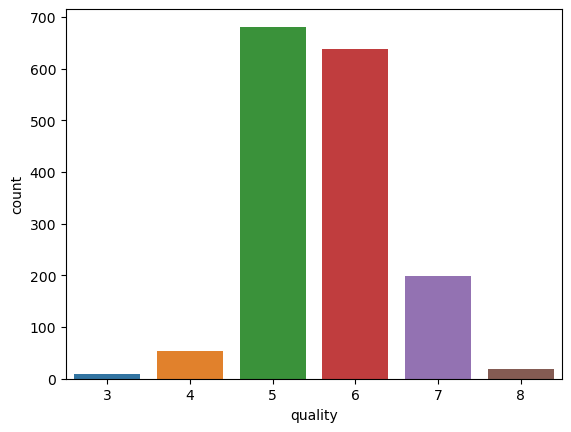

In [8]:
sns.countplot(data=df, x='quality')

<AxesSubplot:>

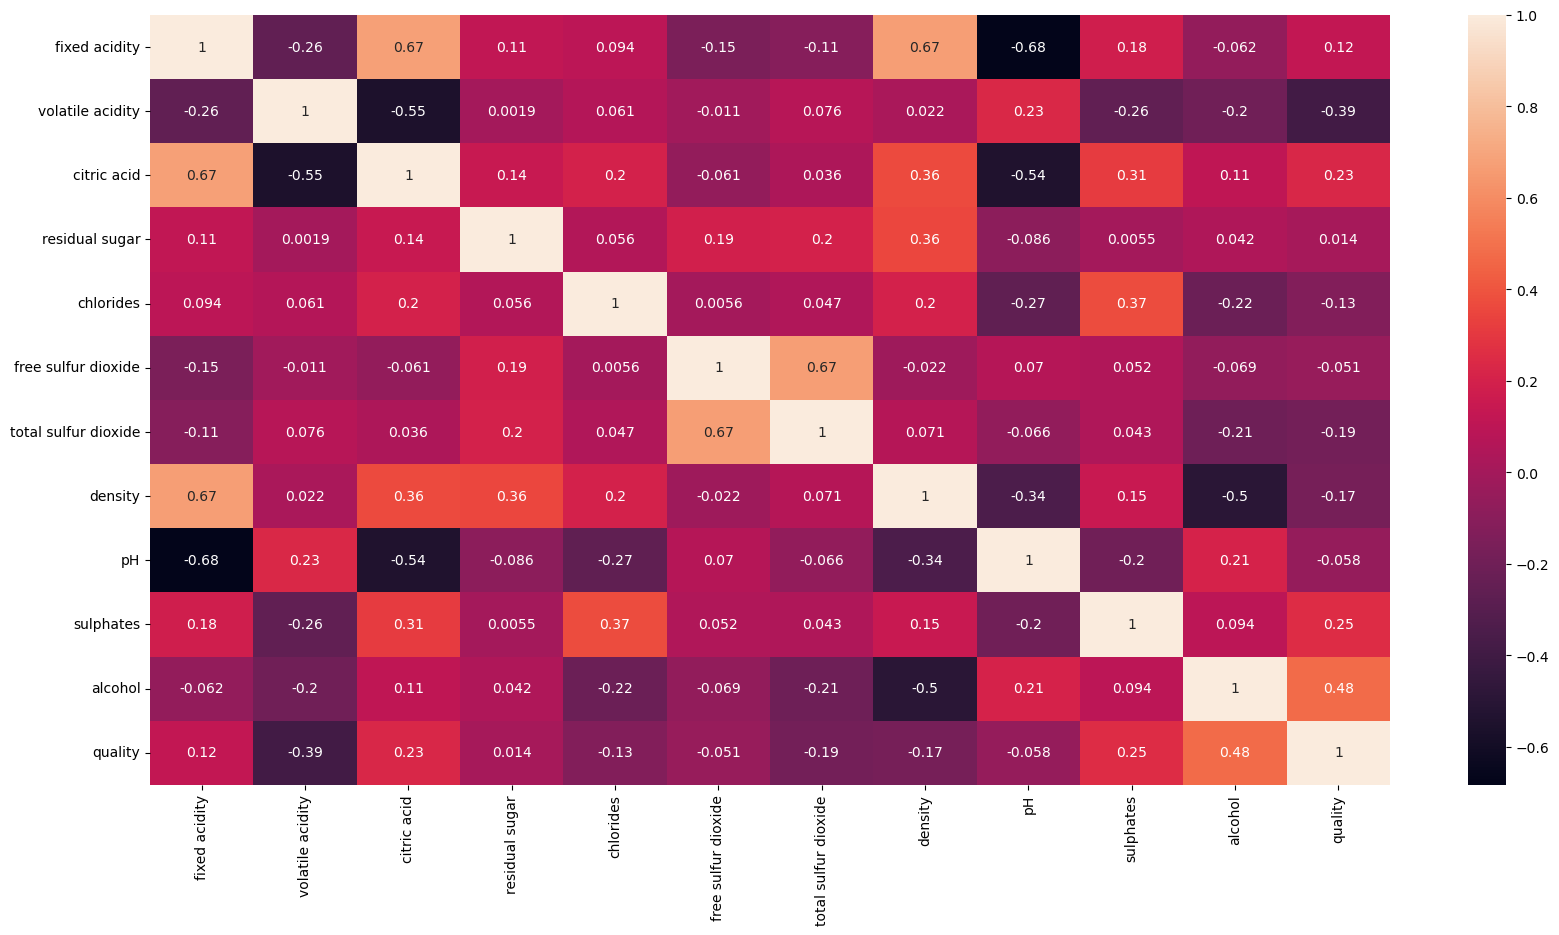

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

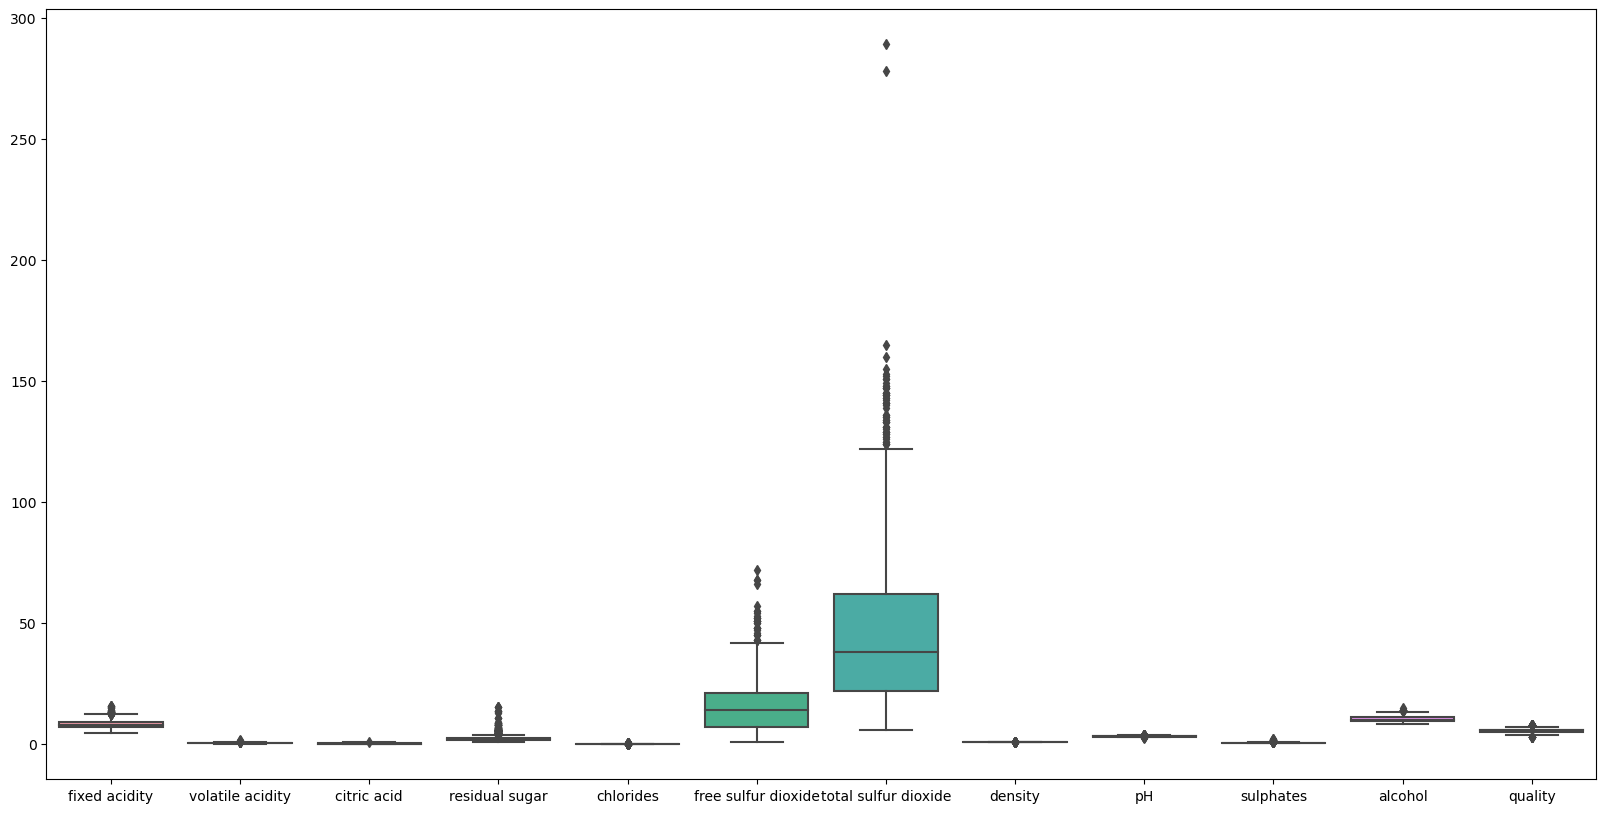

In [10]:
plt.figure(figsize = (20,10))
sns.boxplot(data=df)

In [11]:
import warnings as wr
wr.filterwarnings('ignore')

def outlier(df):
    df1=df.copy()
    df=df._get_numeric_data()
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    
    for col in df.columns:
        for i in range(0,len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]
                
            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]
    
    for col in df.columns:
        df1[col]=df[col]
        
    return(df1)

df=outlier(df)

<AxesSubplot:>

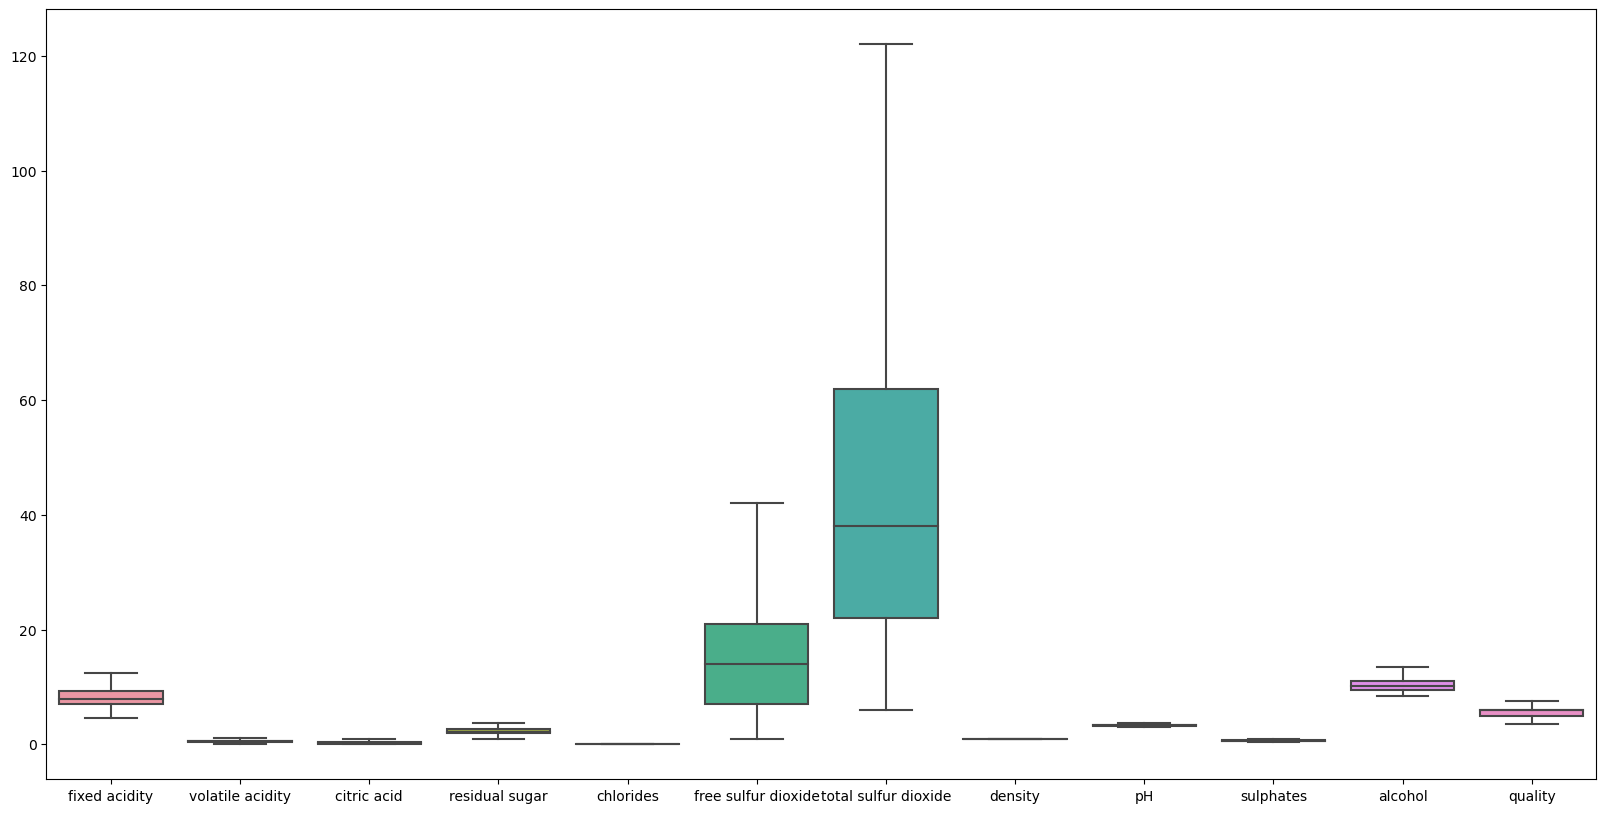

In [12]:
plt.figure(figsize = (20,10))
sns.boxplot(data=df)

In [13]:
df['good_quality']=["yes" if x>=7 else 'no' for x in df['quality']]
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
985,7.4,0.58,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.3,6.0,no
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6.0,no
1419,7.7,0.64,0.21,2.2,0.077,32.0,122.0,0.99560,3.27,0.45,9.9,5.0,no
967,8.5,0.66,0.20,2.1,0.097,23.0,113.0,0.99733,3.13,0.48,9.2,5.0,no
196,7.3,0.58,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5.0,no


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['good_quality']=le.fit_transform(df['good_quality'])

In [15]:
df['good_quality'].value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

In [16]:
x=df.drop(['quality','good_quality'],axis=1)
y=df['good_quality']

In [17]:
from imblearn.over_sampling import SMOTE

x,y = SMOTE().fit_resample(x,y)
y.value_counts()

0    1382
1    1382
Name: good_quality, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


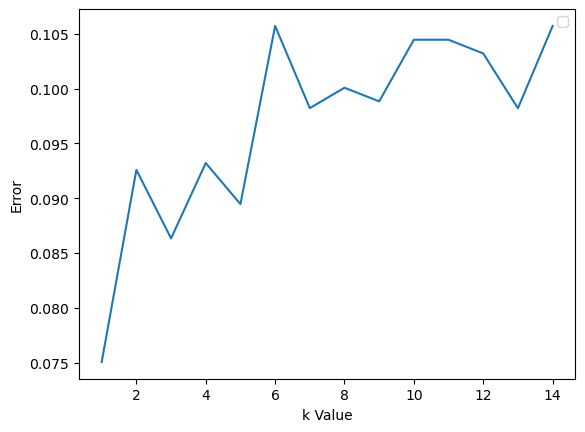

In [22]:
error= []

for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,df,df['good_quality'],cv=10)
    error.append(1-score.mean())
    
plt.plot(range(1,15),error)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [23]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

In [24]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[227,  47],
       [  4, 275]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

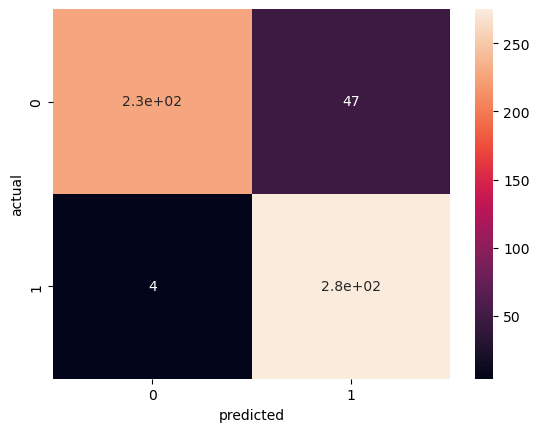

In [27]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9077757685352622

In [29]:
precision = precision_score(y_test, y_pred)
precision

0.8540372670807453

In [30]:
recall = recall_score(y_test, y_pred)
recall

0.985663082437276

In [31]:
f1 = f1_score(y_test, y_pred)
f1

0.9151414309484193

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       274
           1       0.85      0.99      0.92       279

    accuracy                           0.91       553
   macro avg       0.92      0.91      0.91       553
weighted avg       0.92      0.91      0.91       553

